۴۰۱۰۴۲۴۴ امیر محمد تقی‌زاده‌گان<br>


Amirmohammad Taghizadehgan      40104244

تمرین شماره ۲ درس شناسایی الگو
<hr>

# importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part1: Parametric Methods
<hr>

## A) ML Parameter Estimate

### a, b)

$$\mu_1 = \begin{bmatrix}0\\5\end{bmatrix} \qquad \Sigma_1 = \begin{bmatrix}1 &1 \\ 1 &2 \end{bmatrix}$$

In [2]:
# a)
np.random.seed(10) # setting numpy seed
mu1 = np.array([0, 5])
sigma1 = np.array([[1, 1], [1, 2]])
# b)
def sample_maker(mu1, sigma1, n):
    samples = np.random.multivariate_normal(mu1.flat, sigma1, n) # producing samples
    mean = np.mean(samples, 0)  # mean of samples
    cov = np.cov(*samples.T)    # cov of samples
    return samples, mean, cov
samples, mean, cov = sample_maker(mu1, sigma1, 10)

### c)

In [3]:
from scipy import stats

x, y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(0, 10, 1000))
pos = np.dstack([x, y])
true_density = stats.multivariate_normal(mean.T, cov).pdf(pos)
estimated_density = np.reshape(stats.gaussian_kde(samples.T)(np.vstack([x.ravel(), y.ravel()])).T, x.shape)

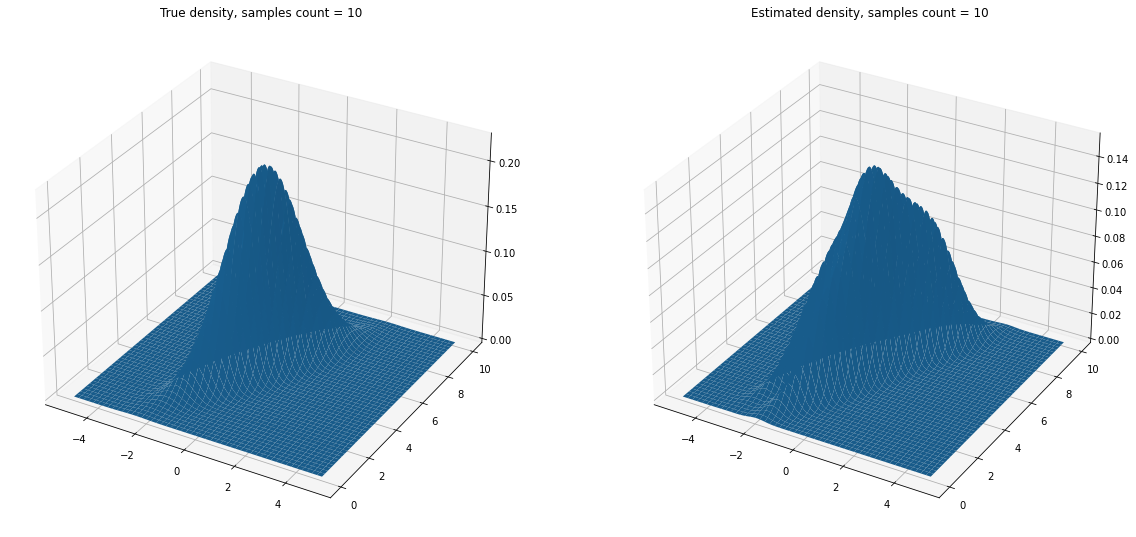

In [4]:
plt.figure(figsize = (20, 20), facecolor = 'white')
ax = plt.subplot(121, projection = '3d')
ax.set_title(f'True density, samples count = {10}')
ax.plot_surface(x, y, true_density)
ax = plt.subplot(122, projection = '3d')
ax.set_title(f'Estimated density, samples count = {10}')
ax.plot_surface(x, y, estimated_density);

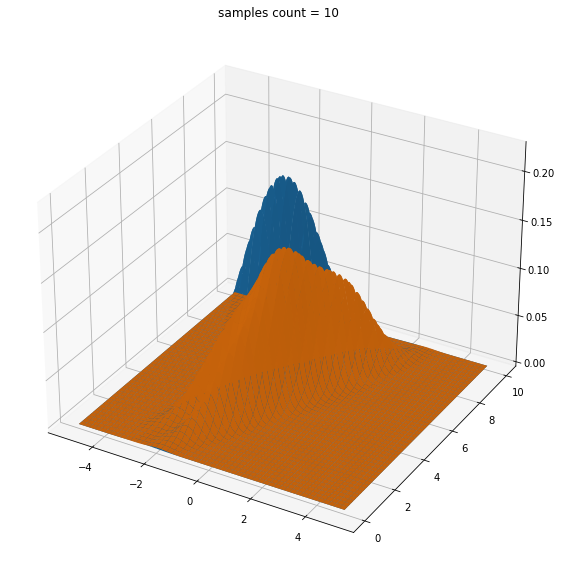

In [5]:
plt.figure(figsize = (10, 10), facecolor = 'white')
ax = plt.subplot(111, projection = '3d')
ax.set_title(f'samples count = {10}')
ax.plot_surface(x, y, true_density)
ax.plot_surface(x, y, estimated_density);

### d)

In [6]:
def bias(theta, thetaHat, p = None):
    if np.any(p == None):
        return np.average(thetaHat, 0) - theta
    else:
        return np.sum(thetaHat * p, 0) - theta

def variance(thetaHat, p = None):
    if np.any(p == None):
        return np.average(thetaHat ** 2, 0) - np.average(thetaHat, 0) ** 2
    else:
        return np.sum(p * (np.sum(thetaHat ** 2, 0) - np.sum(thetaHat, 0) ** 2), 0)

In [7]:
n = 20
m = 20
np.random.seed(None) # resetting numpy seed
means = np.zeros((m, *mu1.shape), 'float64')
vars = means.copy()
covs = np.zeros((m, *sigma1.shape), 'float64')
for i in range(m):
    samples, mean, cov = sample_maker(mu1, sigma1, n)
    means[i] = mean
    vars[i] = np.var(samples, 0)
    covs[i] = cov

print(f'bias_µ = {bias(mu1, means)}')
print(f'bias_\U000003C32 = {bias(np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), vars)}')
print(f'bias_cov = \n{bias(sigma1, covs)}\n')

print(f'variance_µ = {variance(means)}\n')
print(f'variance_\U000003C32 = {variance(vars)}\n')
print(f'variance_cov = \n{variance(covs)}')

bias_µ = [-0.00910243  0.07266081]
bias_σ2 = [-0.11300015 -0.13410643]
bias_cov = 
[[-0.06631594 -0.05466354]
 [-0.05466354 -0.0359015 ]]

variance_µ = [0.05468481 0.07292481]

variance_σ2 = [0.15536399 0.47200266]

variance_cov = 
[[0.17214846 0.25960455]
 [0.25960455 0.52299464]]


In [8]:
print('estimated variance by mean = ', variance(means)*m, '\nTrue variance is = ', np.sum(sigma1 * np.eye(sigma1.shape[0]), 0))

estimated variance by mean =  [1.09369611 1.45849625] 
True variance is =  [1. 2.]


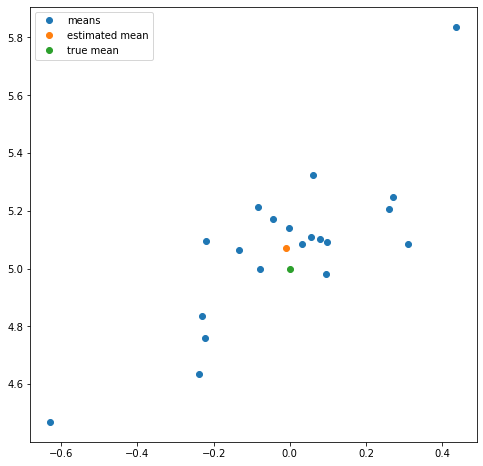

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(*means.T, 'o', label = 'means')
plt.plot(*means.T.mean(1), 'o', label = 'estimated mean')
plt.plot(*mu1, 'o', label = 'true mean')

plt.legend();

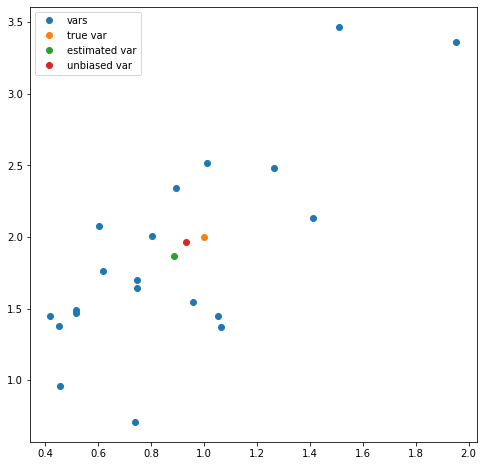

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(*vars.T, 'o', label = 'vars')
plt.plot(*np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), 'o', label = 'true var')
plt.plot(*vars.T.mean(1), 'o', label = 'estimated var')
plt.plot(*vars.T.mean(1)*m/(m-1), 'o', label = 'unbiased var')

plt.legend();

In [11]:
print(vars.mean(0), '\n', variance(means)*m)

[0.88699985 1.86589357] 
 [1.09369611 1.45849625]


همانگونه که در پلات ها مشاهده میشود میانگین تخمینی و واقعی بسیار نزدیک به یکدیگرند و همین نشان میدهد که میانگین آنبایاسد میباشد. همینطور واریانس به دست آمده بسیار نزدیک به واریانس واقعی میباشد و اگر از فرمول واریانس آنبایاسد استفاده کنیم، بسیار نزدیک تر هم میشود. 

### e)

-----------------------------------------------100-----------------------------------------------
bias_µ = [-0.02408116 -0.02637925]
bias_σ2 = [-0.00912514 -0.00902922]
bias_cov = 
[[0.0008837  0.01844141]
 [0.01844141 0.0110816 ]]

variance_µ = [0.01482255 0.01709188]

variance_σ2 = [0.01835083 0.0792231 ]

variance_cov = 
[[0.01872343 0.03998595]
 [0.03998595 0.08083165]]
-----------------------------------------------1000-----------------------------------------------
bias_µ = [-0.0053769   0.00566712]
bias_σ2 = [-0.00989231  0.0030154 ]
bias_cov = 
[[-0.00890121 -0.00399365]
 [-0.00399365  0.00502042]]

variance_µ = [0.00076801 0.00190445]

variance_σ2 = [0.00230609 0.00374415]

variance_cov = 
[[0.00231071 0.00301298]
 [0.00301298 0.00375165]]


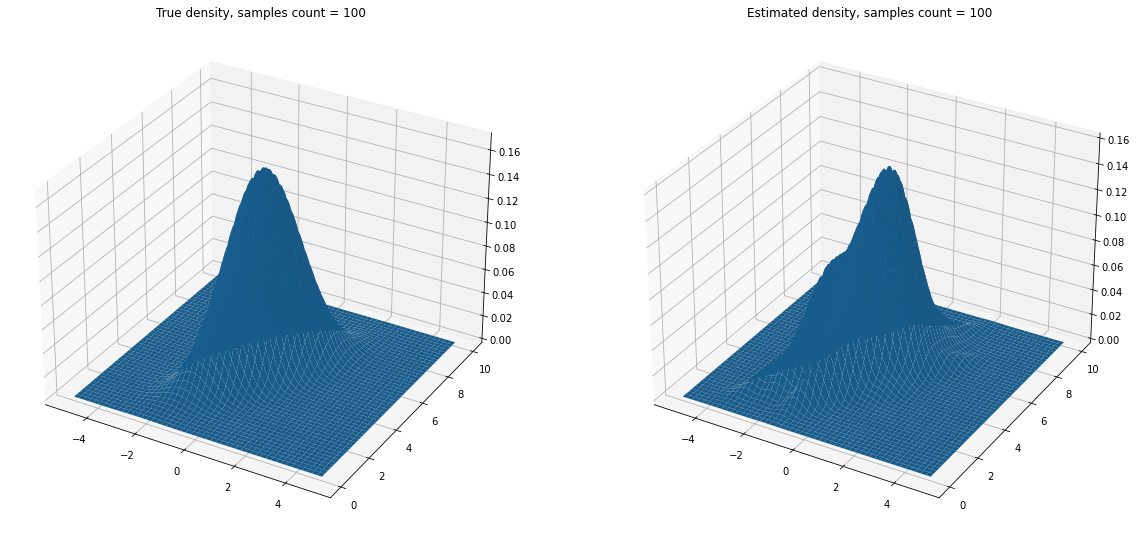

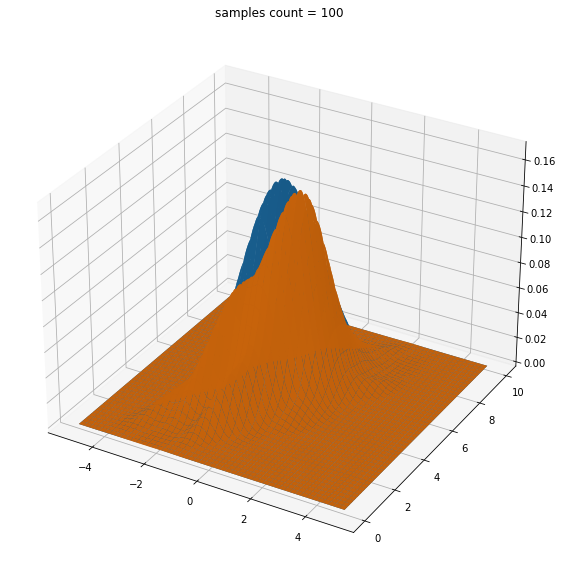

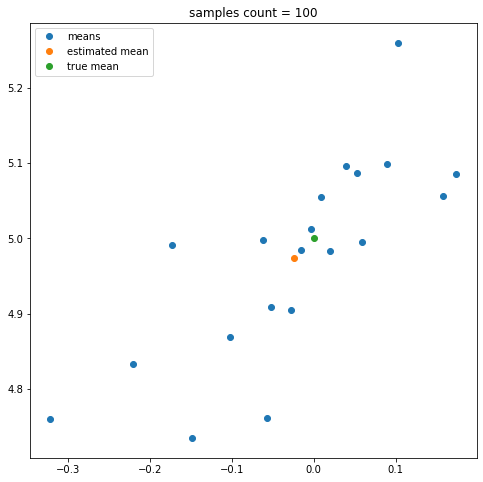

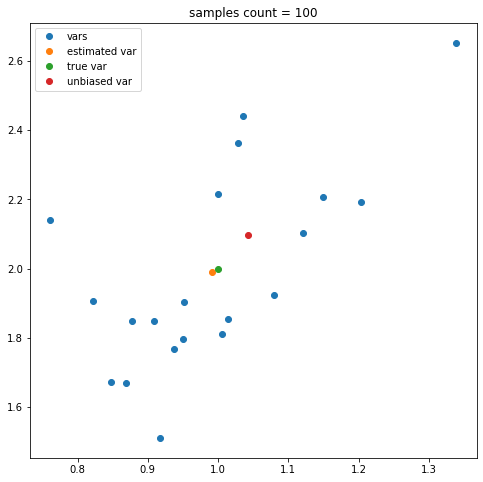

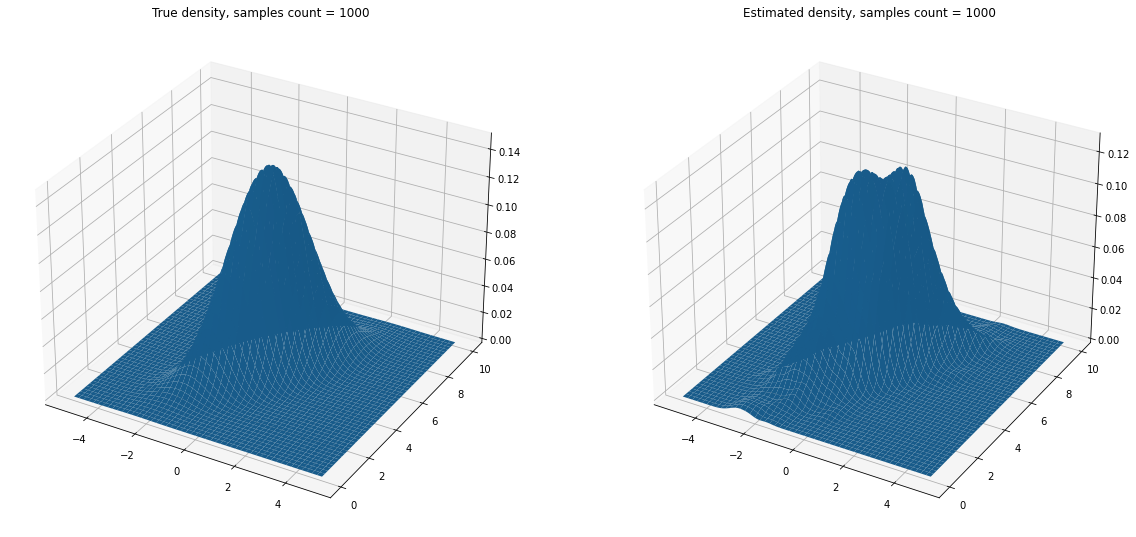

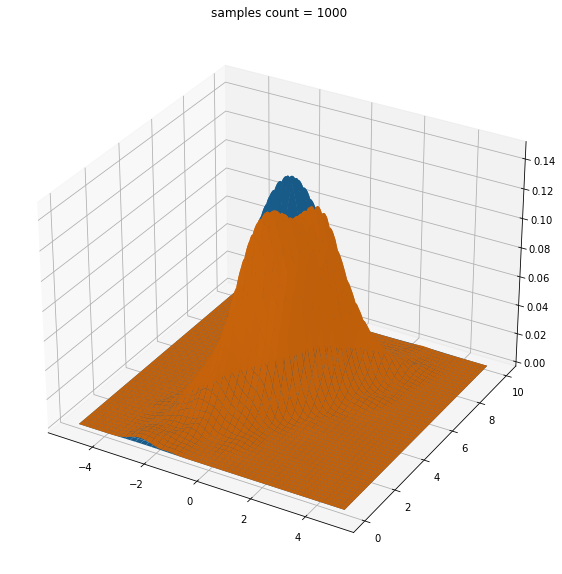

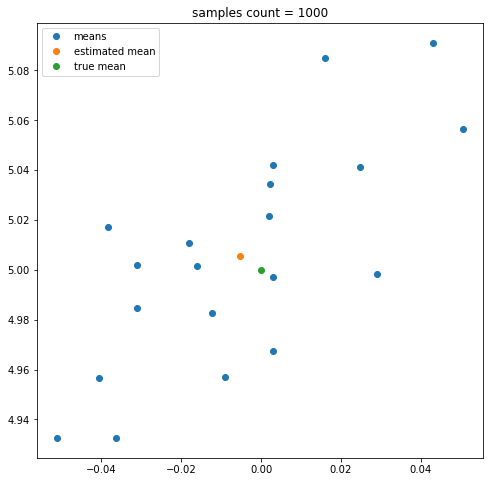

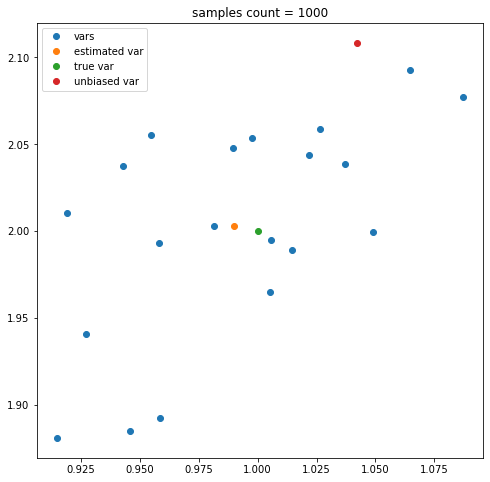

In [12]:
ns = [100, 1000]
m = 20
np.random.seed(None) # resetting numpy seed
for n in ns:
    print(f'-----------------------------------------------{n}-----------------------------------------------')
    means = np.zeros((m, *mu1.shape), 'float64')
    vars = means.copy()
    covs = np.zeros((m, *sigma1.shape), 'float64')
    for i in range(m):
        samples, mean, cov = sample_maker(mu1, sigma1, n)
        means[i] = mean
        vars[i] = np.var(samples, 0)
        covs[i] = cov

    print(f'bias_µ = {bias(mu1, means)}')
    print(f'bias_\U000003C32 = {bias(np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), vars)}')
    print(f'bias_cov = \n{bias(sigma1, covs)}\n')

    print(f'variance_µ = {variance(means)}\n')
    print(f'variance_\U000003C32 = {variance(vars)}\n')
    print(f'variance_cov = \n{variance(covs)}')

    true_density = stats.multivariate_normal(mean.T, cov).pdf(pos)
    estimated_density = np.reshape(stats.gaussian_kde(samples.T)(np.vstack([x.ravel(), y.ravel()])).T, x.shape)

    plt.figure(figsize = (20, 20), facecolor = 'white')
    ax = plt.subplot(121, projection = '3d')
    ax.set_title(f'True density, samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax = plt.subplot(122, projection = '3d')
    ax.set_title(f'Estimated density, samples count = {n}')
    ax.plot_surface(x, y, estimated_density);

    plt.figure(figsize = (10, 10), facecolor = 'white')
    ax = plt.subplot(111, projection = '3d')
    ax.set_title(f'samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax.plot_surface(x, y, estimated_density);

    plt.figure(figsize=(8, 8))
    plt.title(f'samples count = {n}')
    plt.plot(*means.T, 'o', label = 'means')
    plt.plot(*means.T.mean(1), 'o', label = 'estimated mean')
    plt.plot(*mu1, 'o', label = 'true mean')

    plt.legend();


    plt.figure(figsize=(8, 8))
    plt.title(f'samples count = {n}')
    plt.plot(*vars.T, 'o', label = 'vars')
    plt.plot(*vars.T.mean(1), 'o', label = 'estimated var')
    plt.plot(*np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), 'o', label = 'true var')
    plt.plot(*vars.T.mean(1)*m/(m-1), 'o', label = 'unbiased var')

    plt.legend();

    np.sum(sigma1 * np.eye(sigma1.shape[0]), 0)/variance(means)
    

هماگونه که انتظار داشتیم، هر چه تعداد سمپل‌ها بیشتر باشد. تخمین به دست آمده دقیق‌تر است.

### f)

-----------------------------------------------10-----------------------------------------------
bias_µ = [-0.0529027  -0.22534245]
bias_σ2 = [-0.18624003  0.19007809]
bias_cov = 
[[-0.09582226 -0.04017557]
 [-0.04017557  0.65564233]]

variance_µ = [0.04506867 0.24370314]

variance_σ2 = [0.13423815 2.91799768]

variance_cov = 
[[0.16572611 0.20163066]
 [0.20163066 3.60246627]]
estimated_mean = [ 4.947 -0.225]
-----------------------------------------------20-----------------------------------------------
bias_µ = [-0.00494581 -0.12244321]
bias_σ2 = [ 0.04624802 -0.0365858 ]
bias_cov = 
[[ 0.10131371 -0.2476731 ]
 [-0.2476731   0.17201495]]

variance_µ = [0.05424378 0.21019856]

variance_σ2 = [0.11023806 1.56087208]

variance_cov = 
[[0.12214743 0.31832738]
 [0.31832738 1.72949814]]
estimated_mean = [ 4.995 -0.122]
-----------------------------------------------100-----------------------------------------------
bias_µ = [-0.01067434  0.11343285]
bias_σ2 = [ 0.01150056 -0.04950215]
bias_

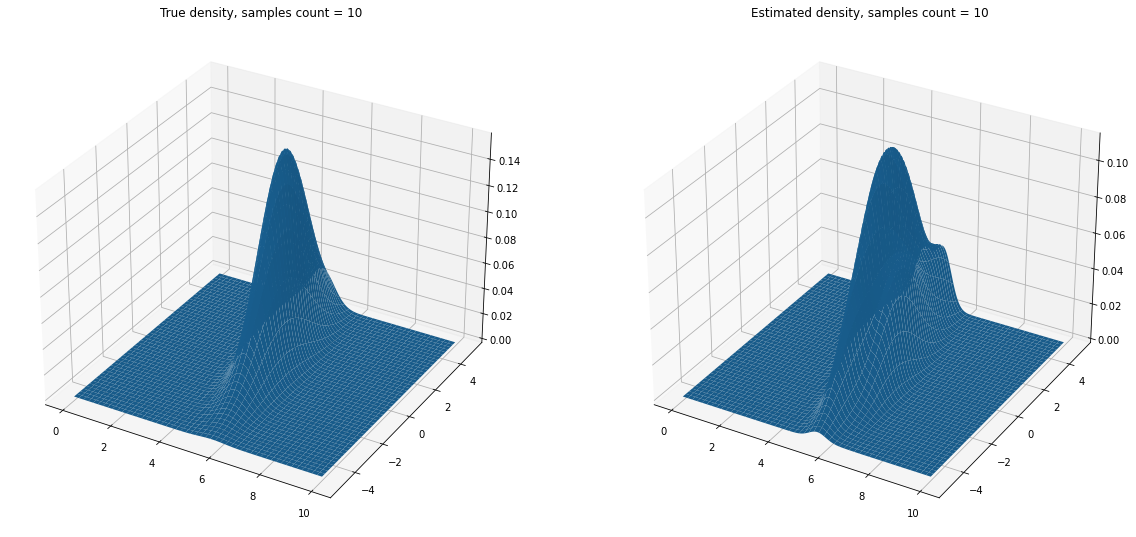

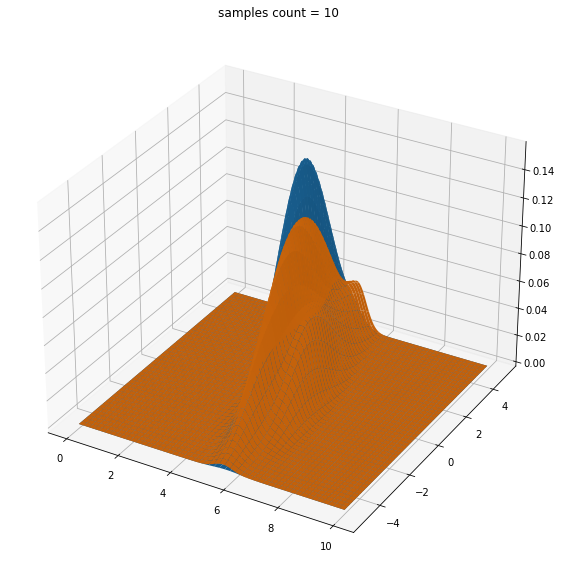

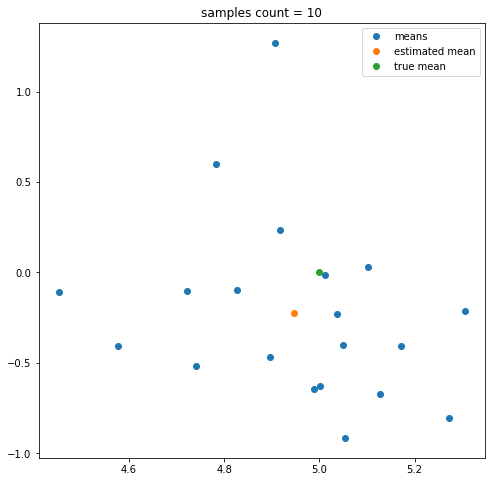

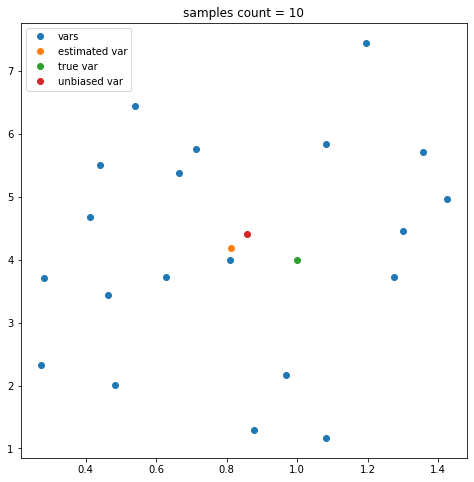

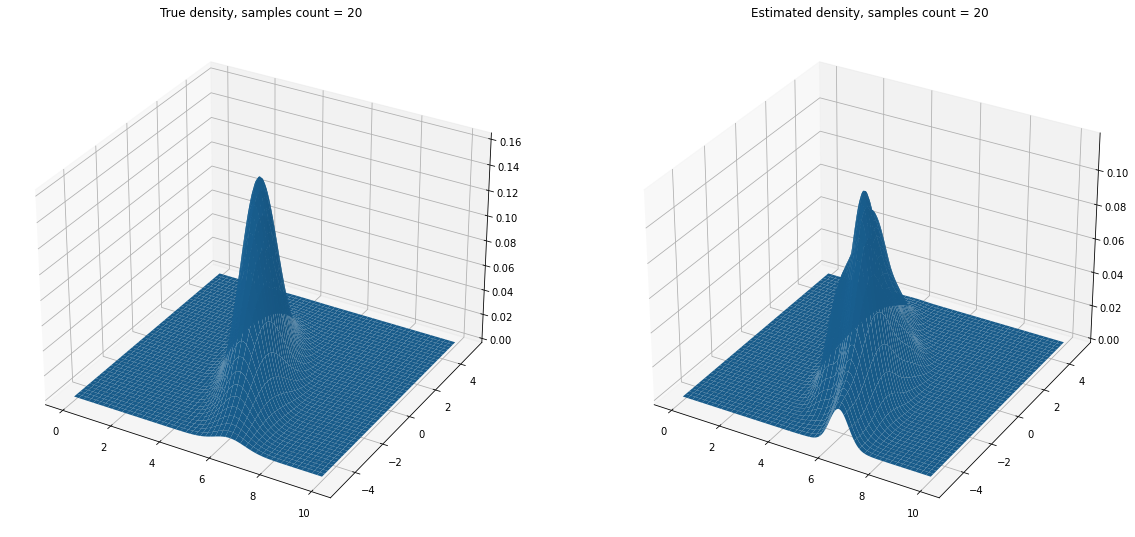

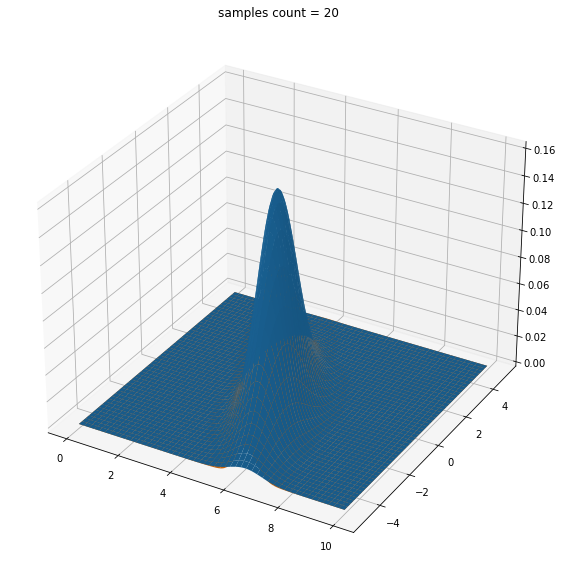

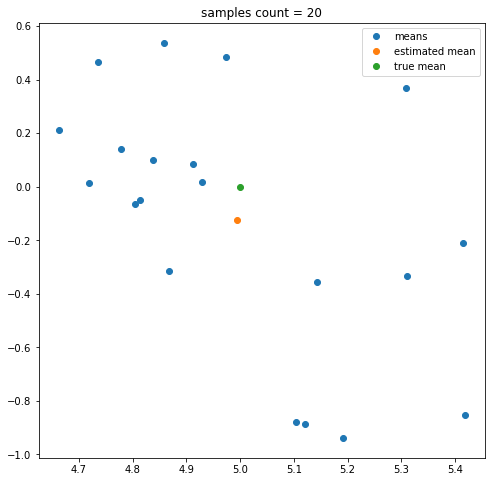

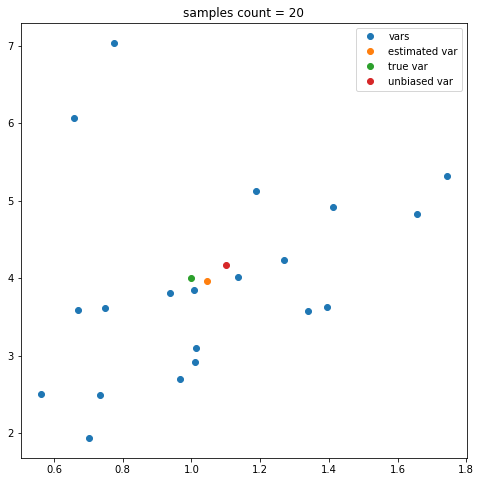

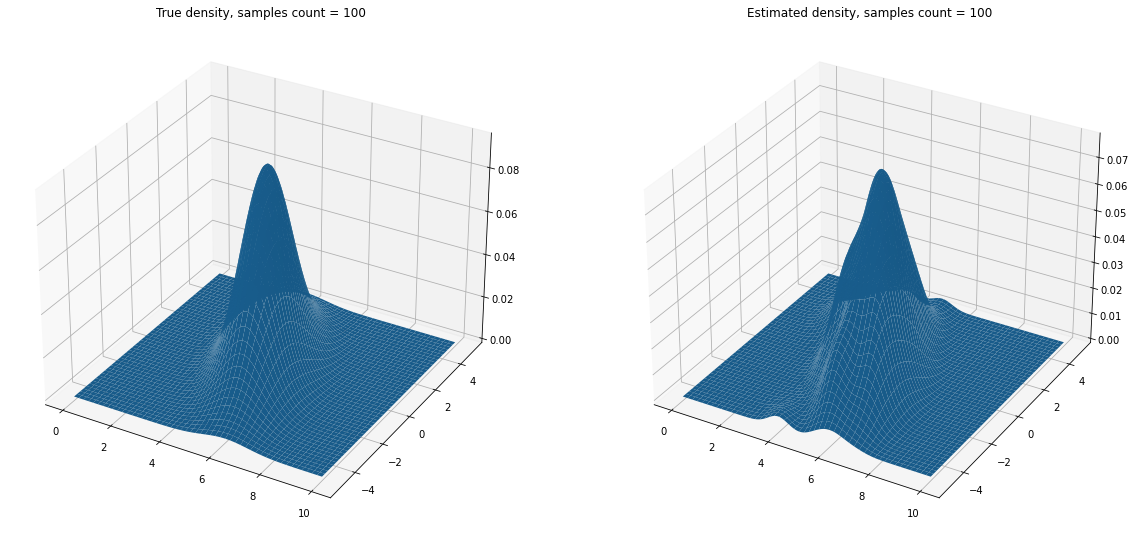

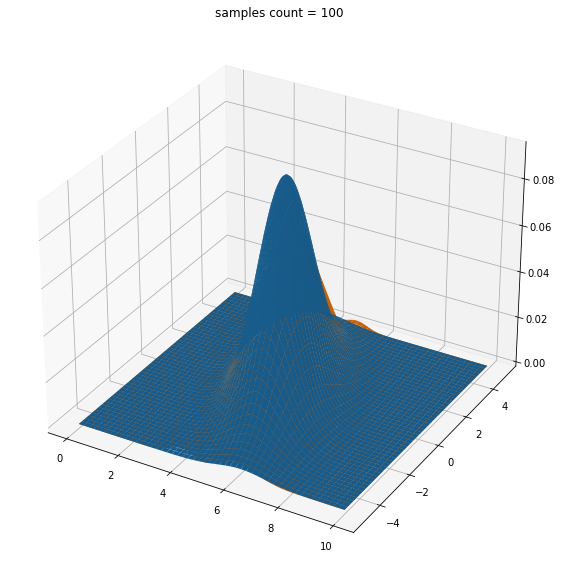

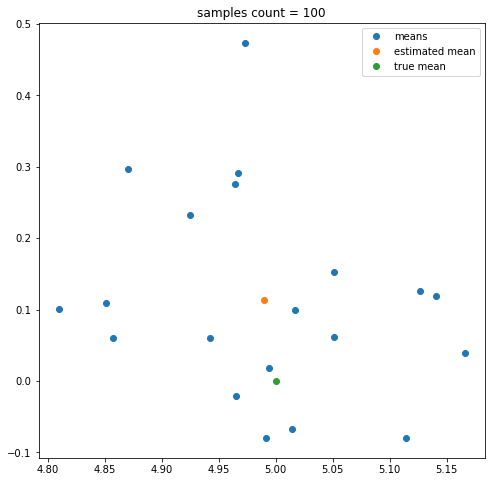

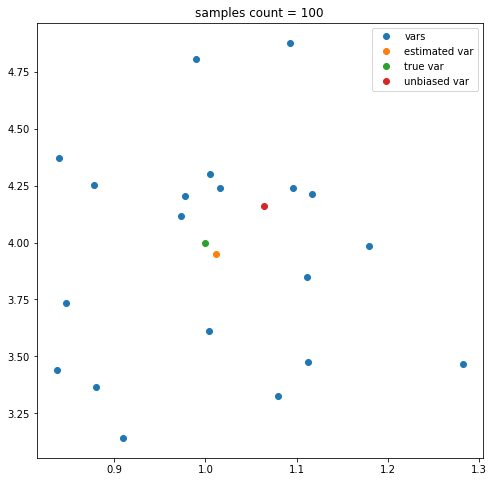

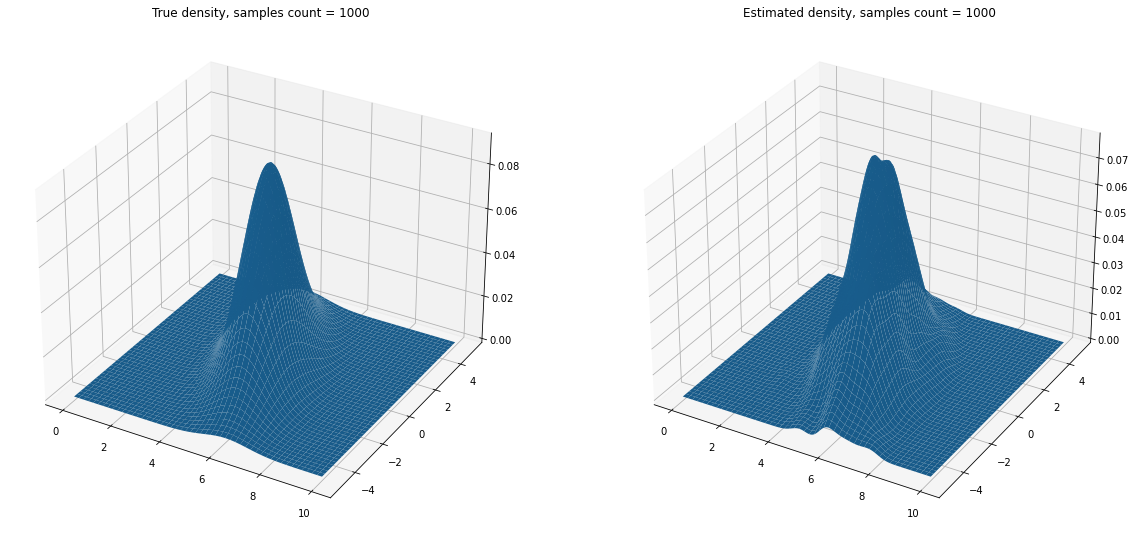

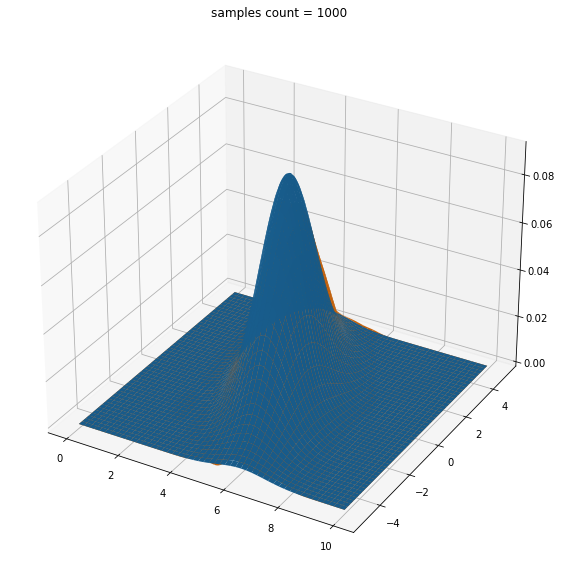

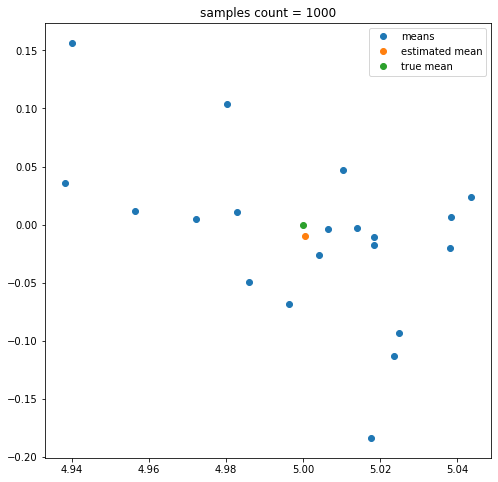

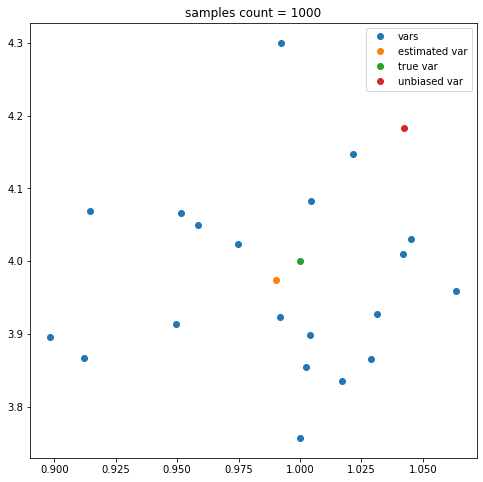

In [13]:
mu1 = np.array([5, 0])
sigma1 = np.array([[1, -1], [-1, 4]])


ns = [10, 20, 100, 1000]
m = 20
x, y = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(-5, 5, 1000))
pos = np.dstack([x, y])
np.random.seed(None) # resetting numpy seed
estimated_mean = []
for n in ns:
    print(f'-----------------------------------------------{n}-----------------------------------------------')
    means = np.zeros((m, *mu1.shape), 'float64')
    vars = means.copy()
    covs = np.zeros((m, *sigma1.shape), 'float64')
    for i in range(m):
        samples, mean, cov = sample_maker(mu1, sigma1, n)
        means[i] = mean
        vars[i] = np.var(samples, 0)
        covs[i] = cov
    estimated_mean.append(means.mean(0)) 
    print(f'bias_µ = {bias(mu1, means)}')
    print(f'bias_\U000003C32 = {bias(np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), vars)}')
    print(f'bias_cov = \n{bias(sigma1, covs)}\n')

    print(f'variance_µ = {variance(means)}\n')
    print(f'variance_\U000003C32 = {variance(vars)}\n')
    print(f'variance_cov = \n{variance(covs)}')

    print(f'estimated_mean = {means.mean(0).round(3)}')

    true_density = stats.multivariate_normal(mean.T, cov).pdf(pos)
    estimated_density = np.reshape(stats.gaussian_kde(samples.T)(np.vstack([x.ravel(), y.ravel()])).T, x.shape)

    plt.figure(figsize = (20, 20), facecolor = 'white')
    ax = plt.subplot(121, projection = '3d')
    ax.set_title(f'True density, samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax = plt.subplot(122, projection = '3d')
    ax.set_title(f'Estimated density, samples count = {n}')
    ax.plot_surface(x, y, estimated_density);

    plt.figure(figsize = (10, 10), facecolor = 'white')
    ax = plt.subplot(111, projection = '3d')
    ax.set_title(f'samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax.plot_surface(x, y, estimated_density);

    plt.figure(figsize=(8, 8))
    plt.title(f'samples count = {n}')
    plt.plot(*means.T, 'o', label = 'means')
    plt.plot(*means.T.mean(1), 'o', label = 'estimated mean')
    plt.plot(*mu1, 'o', label = 'true mean')

    plt.legend();


    plt.figure(figsize=(8, 8))
    plt.title(f'samples count = {n}')
    plt.plot(*vars.T, 'o', label = 'vars')
    plt.plot(*vars.T.mean(1), 'o', label = 'estimated var')
    plt.plot(*np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), 'o', label = 'true var')
    plt.plot(*vars.T.mean(1)*m/(m-1), 'o', label = 'unbiased var')

    plt.legend();

    np.sum(sigma1 * np.eye(sigma1.shape[0]), 0)/variance(means)

هر چقدر که قله های تابع اصلی تیز تر یا بیشتر و نمونه ها کمتر باشد تخمین پارامتر ها سخت تر میشود

## B) MAP Parameter Estimate

In [14]:
m = 20
prior = np.random.multivariate_normal([0, 0], np.eye(2) * 10, m)
prior = np.abs(prior)/prior.__abs__().sum(0)
mu1 = np.array([0, 5])
sigma1 = np.array([[1, 1], [1, 2]])

ns = [10, 100, 1000]
estimated_mean = []

x, y = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(-5, 5, 1000))
pos = np.dstack([x, y])
np.random.seed(None) # resetting numpy seed
for n in ns:
    means = np.zeros((m, *mu1.shape), 'float64')
    vars = means.copy()
    covs = np.zeros((m, *sigma1.shape), 'float64')
    for i in range(m):
        samples, mean, cov = sample_maker(mu1, sigma1, n)
        means[i] = mean
        vars[i] = np.var(samples, 0)
        covs[i] = cov
    estimated_mean.append(means[np.argmax(prior, 0), [0, 1]])
    print(f'-------------------------------n = {n}------------------------------------')
    print(f'bias_µ = {bias(mu1, means, prior)}')
    print(f'bias_\U000003C32 = {bias(np.sum(sigma1 * np.eye(sigma1.shape[0]), 0), vars, prior)}\n')

    print(f'variance_µ = {variance(means, prior)}\n')
    print(f'variance_\U000003C32 = {variance(vars, prior)}\n')
    print(f'estimated mean = {means[np.argmax(prior, 0), [0, 1]].round(3)}')

-------------------------------n = 10------------------------------------
bias_µ = [-0.03311893 -0.14389619]
bias_σ2 = [-0.08705528 -0.36096928]

variance_µ = [ 1.27886705e+00 -9.16347511e+03]

variance_σ2 = [ -304.09779418 -1158.52833876]

estimated mean = [-0.265  4.296]
-------------------------------n = 100------------------------------------
bias_µ = [0.03614609 0.0334862 ]
bias_σ2 = [0.05812512 0.09103206]

variance_µ = [-2.79106673e-01 -9.58214655e+03]

variance_σ2 = [ -393.78857816 -1560.51559463]

estimated mean = [0.088 5.232]
-------------------------------n = 1000------------------------------------
bias_µ = [0.01003625 0.00505192]
bias_σ2 = [0.02758528 0.02447925]

variance_µ = [ 1.47015934e-02 -9.52907339e+03]

variance_σ2 = [ -395.86475985 -1546.2948087 ]

estimated mean = [0.043 5.024]


<table>
<tr>
    <th rowspan = "2">#Samples</th>
    <th rowspan = '2'>True Mean</th>
    <th colspan = '3'>Estimated mean</th></tr>
<tr><th>10</th><th>100</th><th>1000</th></tr>
<tr><td>&#956;<sub>ML</sub></td><td rowspan = '2'> [0 5]<sup>T</sup></td><td>[0.079 5.14]<sup>T</sup></td><td>[3.000e-03 5.033e+00]<sup>T</sup></td><td>[-1.000e-03  4.995e+00]<sup>T</sup></td></tr>
<tr><td>&#956;<sub>MAP</sub><td>[-0.25   4.905]<sup>T</sup></td><td>[-0.091  5.017]<sup>T</sup></td><td>[0.014 4.914]<sup>T</sup></td></tr>
</table>

در اینجا چون پرایور تصمیم گیرنده است و ما پرایور های دقیقی نداریم. ماکزیمم لایکلیهود جواب دقیق تر ارائه میدهد. 

<hr>

# Part2: Non-Parametric Methods
<hr>

## C) Non-Parameter

### a)

In [36]:
n = 200
mu1 = np.array([0, 5])
sigma1 = np.array([[1, 1], [1, 2]])
mu2 = np.array([5, 0])
sigma2 = np.array([[1, -1], [-1, 4]])
samples = np.r_[np.random.multivariate_normal(mu1, sigma1, int(.5 * n)), np.random.multivariate_normal(mu2, sigma2, int(.5 * n))]

(200, 2)

In [37]:
def phi(distance):
    result = np.zeros_like(distance, dtype=bool)
    result[distance<=(1/2)] = True
    return result

def k(x, x0, h):
    return np.sum(phi(np.linalg.norm((x0-x)/h, axis = x.ndim-1)), axis = -1)

In [38]:
distance_table = np.linalg.norm((samples.reshape(-1, 1, 2)-samples), axis = 2).reshape(samples.shape[0], -1)
distance_table

array([[0.        , 0.19855463, 3.07579255, ..., 8.06340771, 8.70629817,
        6.05879217],
       [0.19855463, 0.        , 3.21811087, ..., 7.94156483, 8.60827128,
        5.93462465],
       [3.07579255, 3.21811087, 0.        , ..., 8.2686636 , 8.4319889 ,
        6.49973789],
       ...,
       [8.06340771, 7.94156483, 8.2686636 , ..., 0.        , 1.36727965,
        2.00856372],
       [8.70629817, 8.60827128, 8.4319889 , ..., 1.36727965, 0.        ,
        2.89711359],
       [6.05879217, 5.93462465, 6.49973789, ..., 2.00856372, 2.89711359,
        0.        ]])

### b)

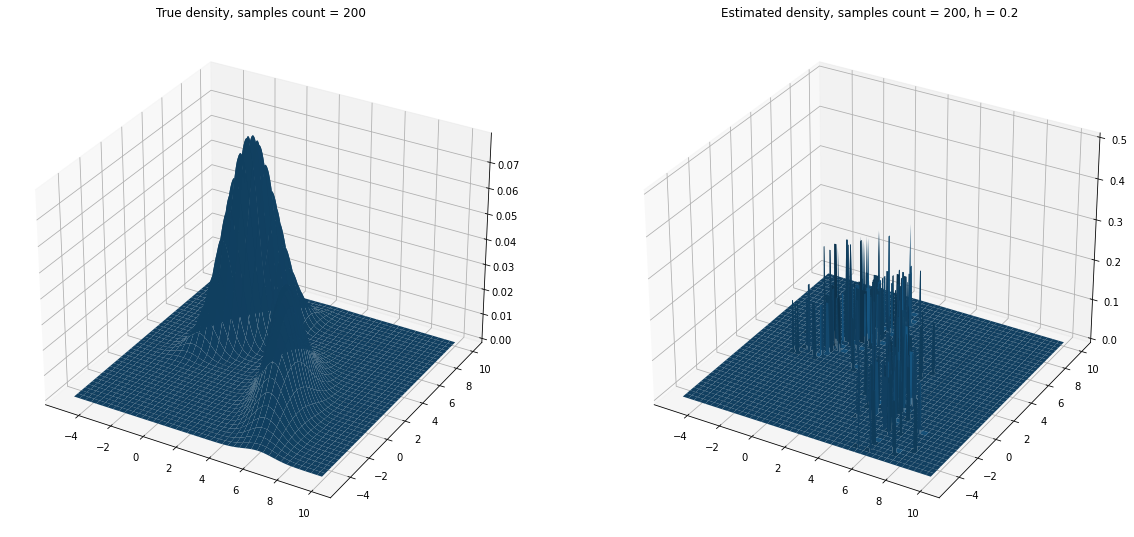

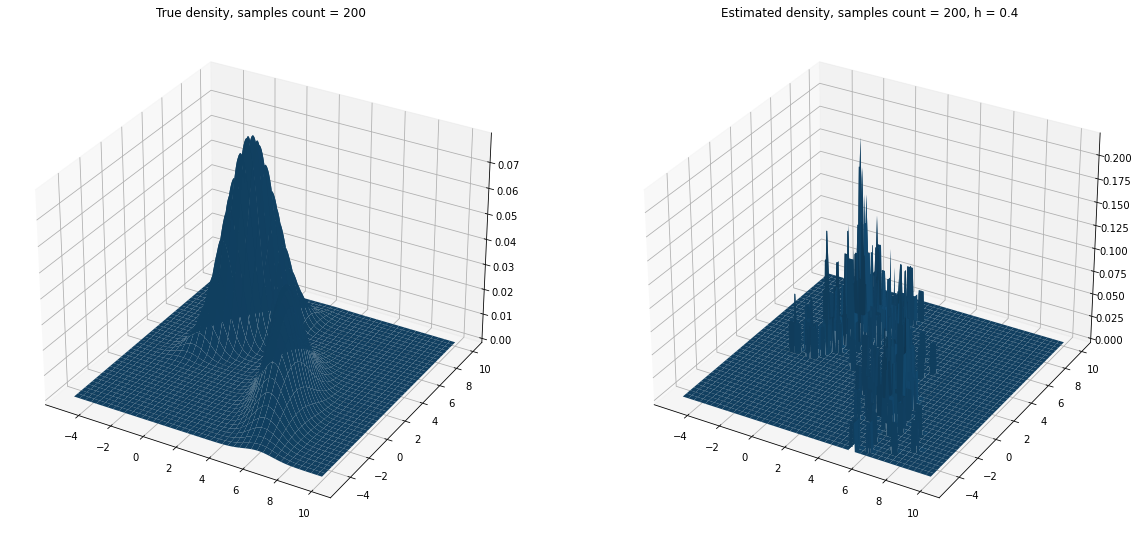

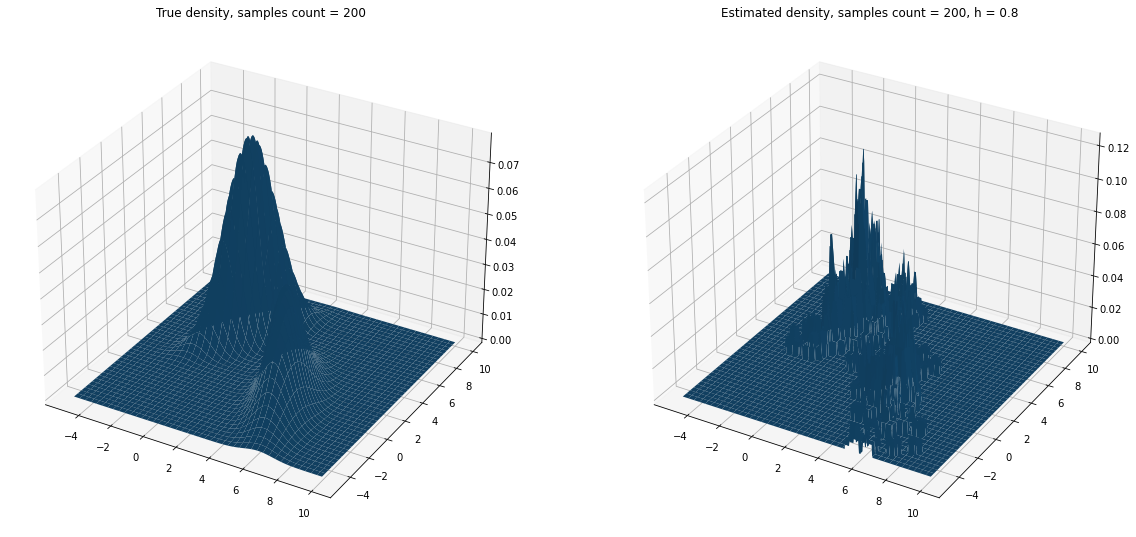

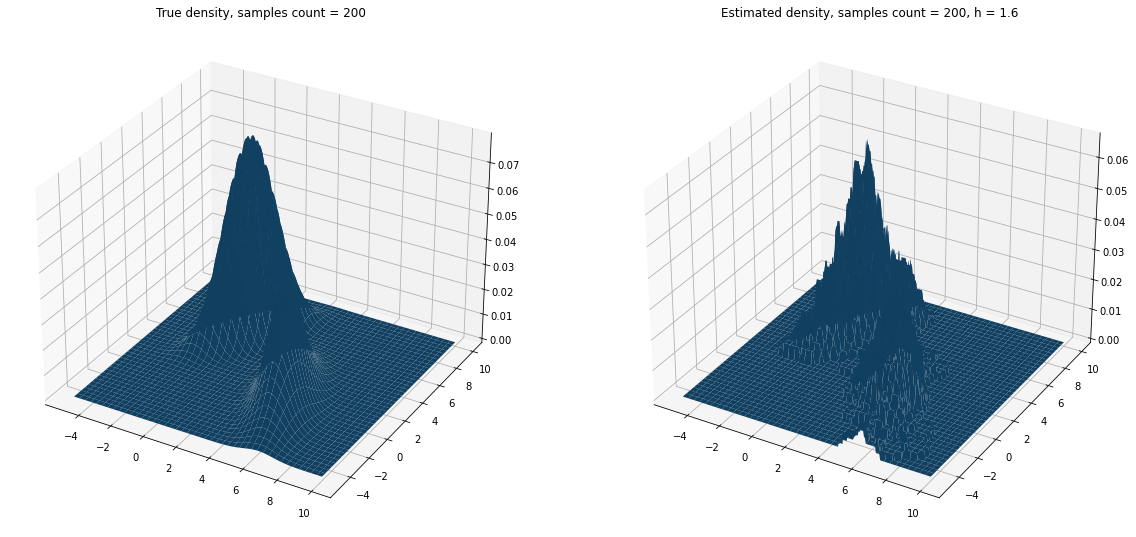

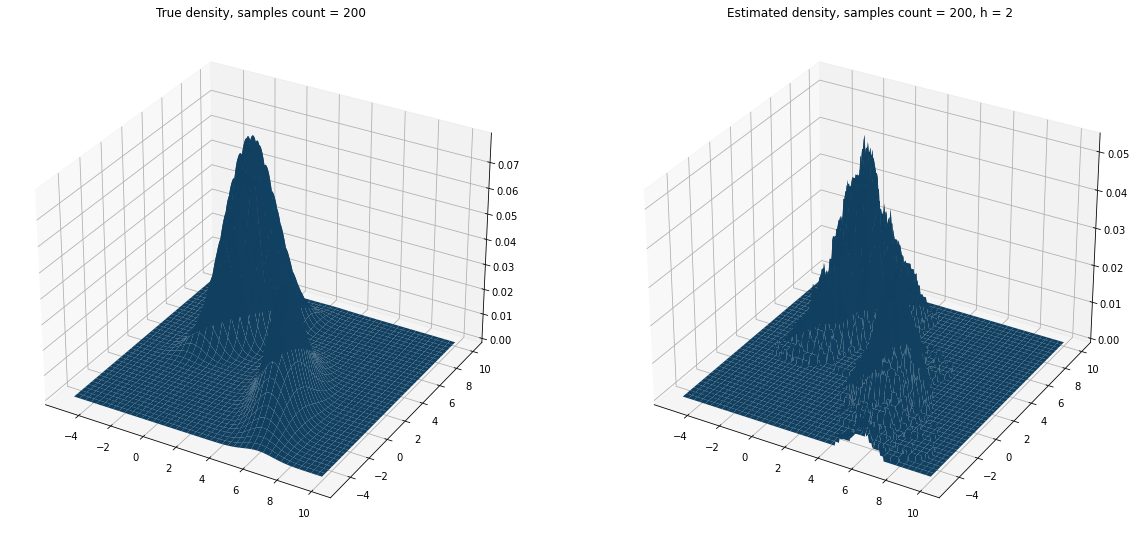

In [39]:
x, y = np.mgrid[-5:10.01:0.05, -5:10.01:0.05]
pos = np.vstack([x.flat, y.flat]).T.reshape(-1, 1, 2)
for h in [0.2, 0.4, 0.8, 1.6, 2]:
    estimated_density = (k(pos, samples, h)/(samples.shape[0] * (h ** samples.shape[1]))).reshape(x.shape)
    true_density = stats.multivariate_normal.pdf(np.dstack([x, y]), mu1, sigma1) * .5 + stats.multivariate_normal.pdf(np.dstack([x, y]), mu2, sigma2) * .5
    plt.figure(figsize = (20, 20), facecolor = 'white')
    ax = plt.subplot(121, projection = '3d')
    ax.set_title(f'True density, samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax = plt.subplot(122, projection = '3d')
    ax.set_title(f'Estimated density, samples count = {n}, h = {h}')
    ax.plot_surface(x, y, estimated_density);

### c) KNN

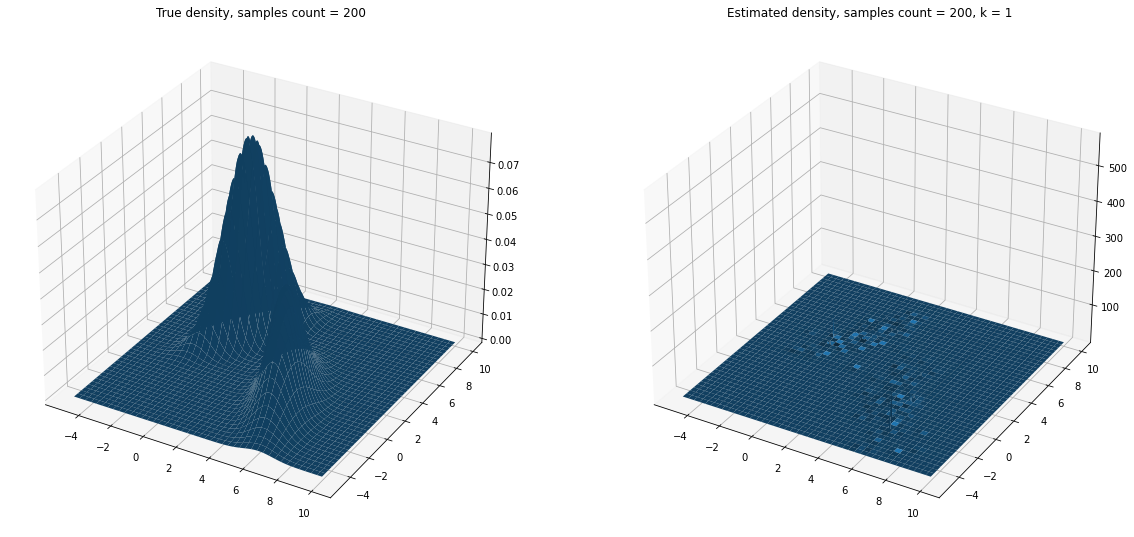

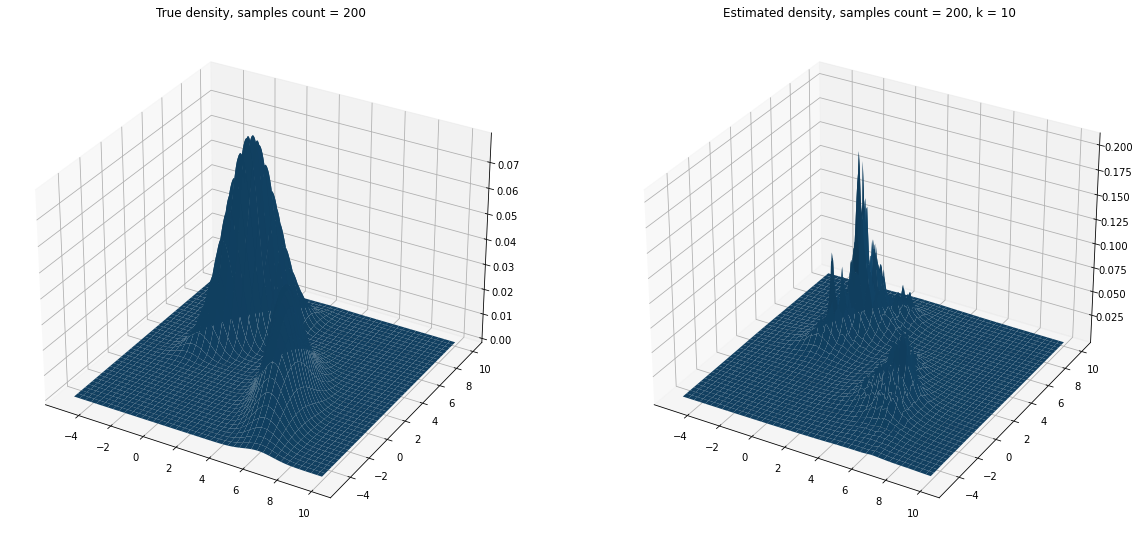

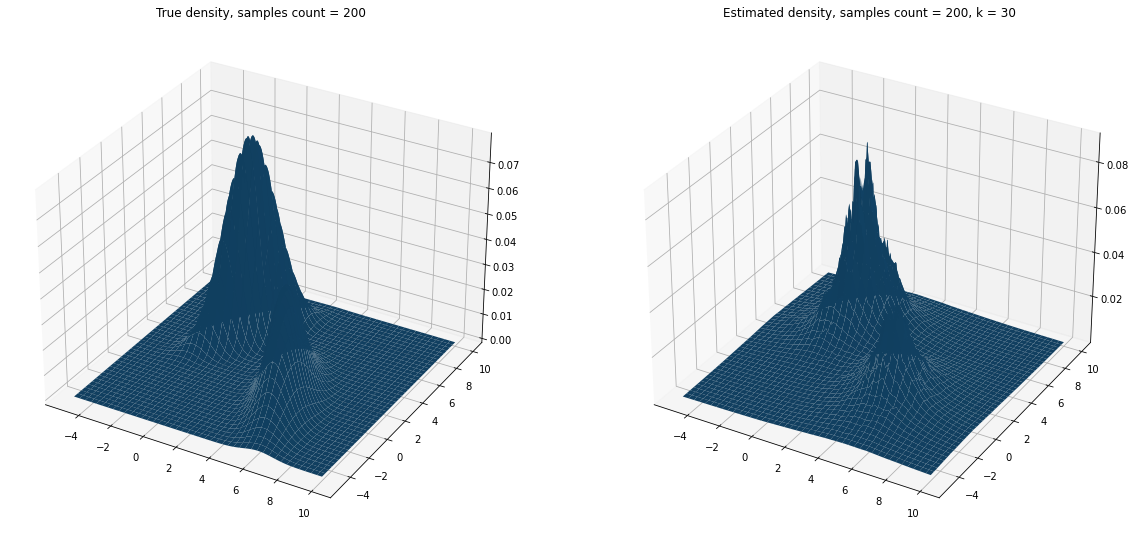

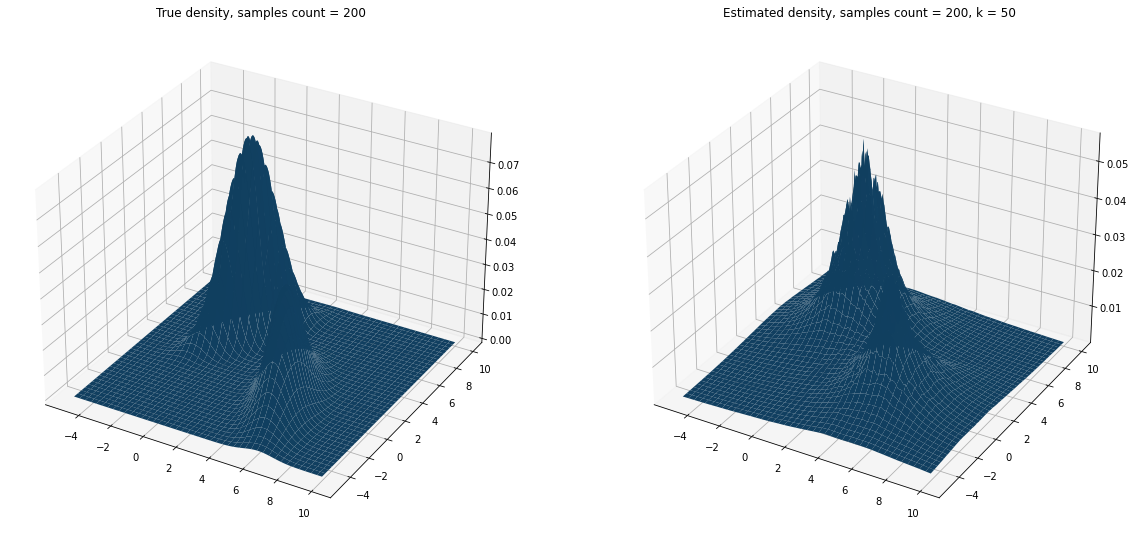

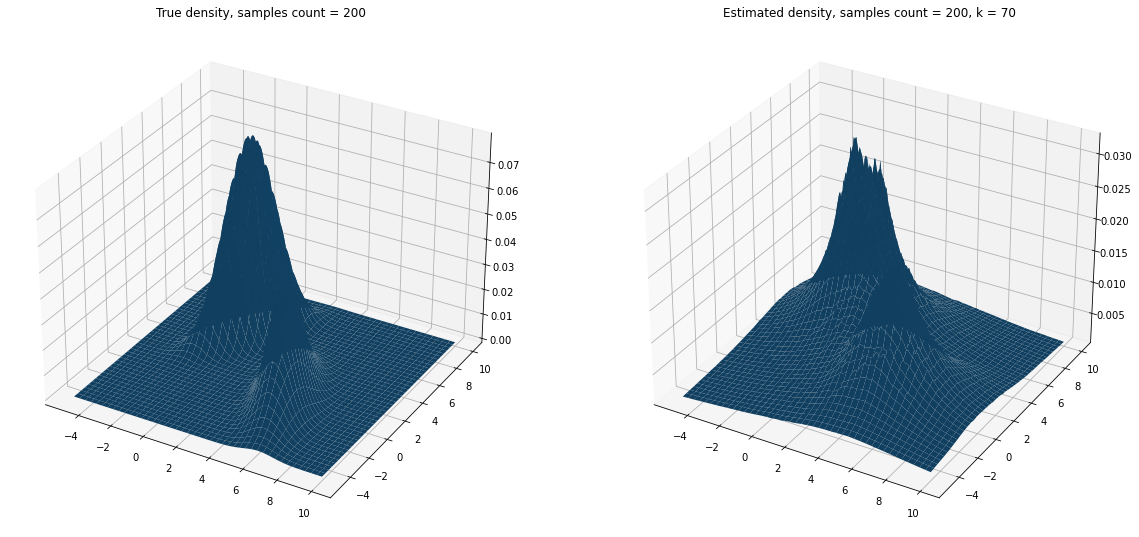

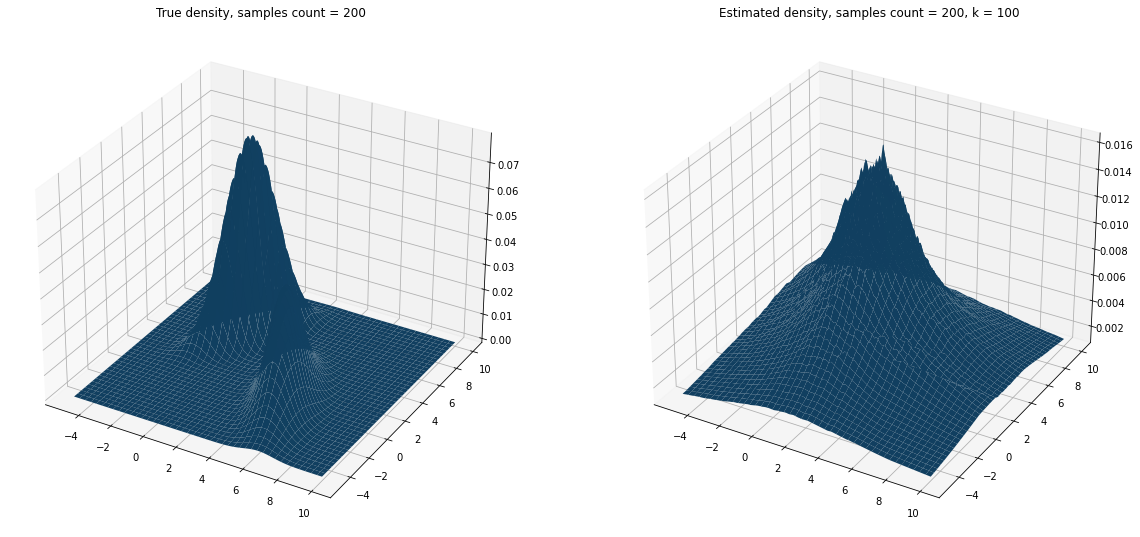

In [40]:
def knn(x, x0, k):
    distance = np.sort(np.linalg.norm(x - x0, axis = x.ndim-1), axis = 1)
    r = distance[:, k-1]
    if x0.shape[1] == 2:
        v = np.pi * r ** 2
    elif x0.shape[1] == 3:
        v = 4/3 * np.pi * r ** 3
    else:
        v = eval(input('please enter volume formula: '))
    return k/(x0.shape[0]*v)

x, y = np.mgrid[-5:10.01:0.05, -5:10.01:0.05]
pos = np.vstack([x.flat, y.flat]).T.reshape(-1, 1, 2)
for k in [1, 10, 30, 50, 70, 100]:
    estimated_density = knn(pos, samples, k).reshape(x.shape)
    true_density = stats.multivariate_normal.pdf(np.dstack([x, y]), mu1, sigma1) * .5 + stats.multivariate_normal.pdf(np.dstack([x, y]), mu2, sigma2) * .5
    plt.figure(figsize = (20, 20), facecolor = 'white')
    ax = plt.subplot(121, projection = '3d')
    ax.set_title(f'True density, samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax = plt.subplot(122, projection = '3d')
    ax.set_title(f'Estimated density, samples count = {n}, k = {k}')
    ax.plot_surface(x, y, estimated_density);

In [44]:
n = 200
mu1 = np.array([0, 5])
sigma1 = np.array([[1, 1], [1, 2]])
mu2 = np.array([5, 0])
sigma2 = np.array([[1, -1], [-1, 4]])
samples = np.r_[np.random.multivariate_normal(mu1, sigma1, int(.5 * n)), np.random.multivariate_normal(mu2, sigma2, int(.5 * n))]

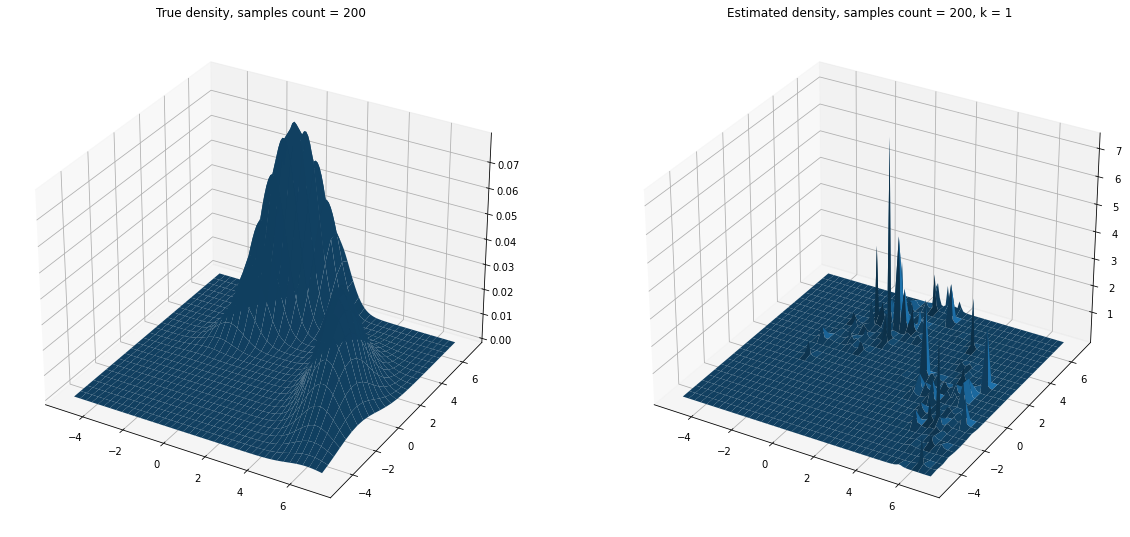

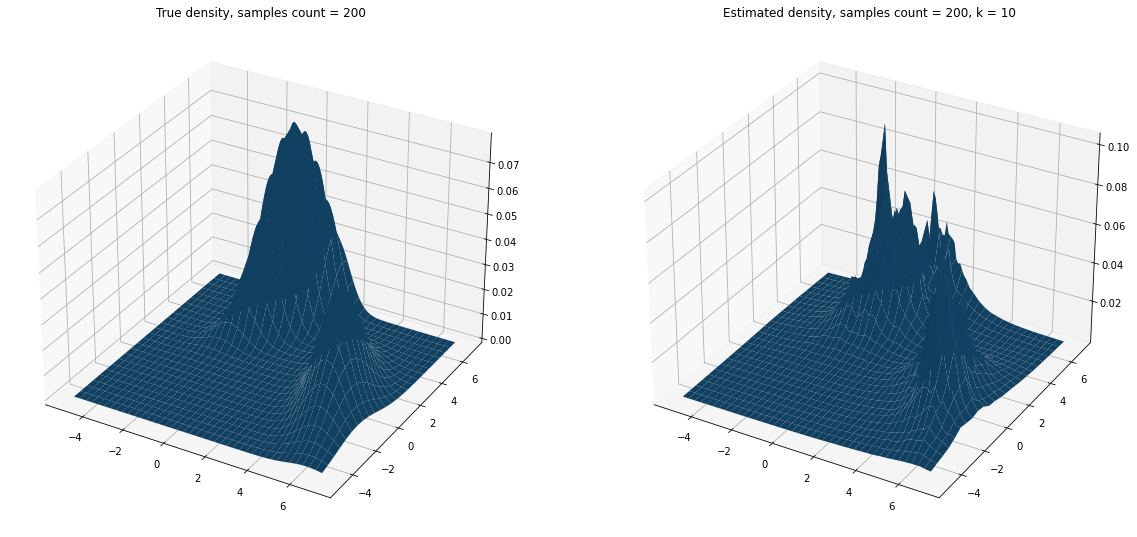

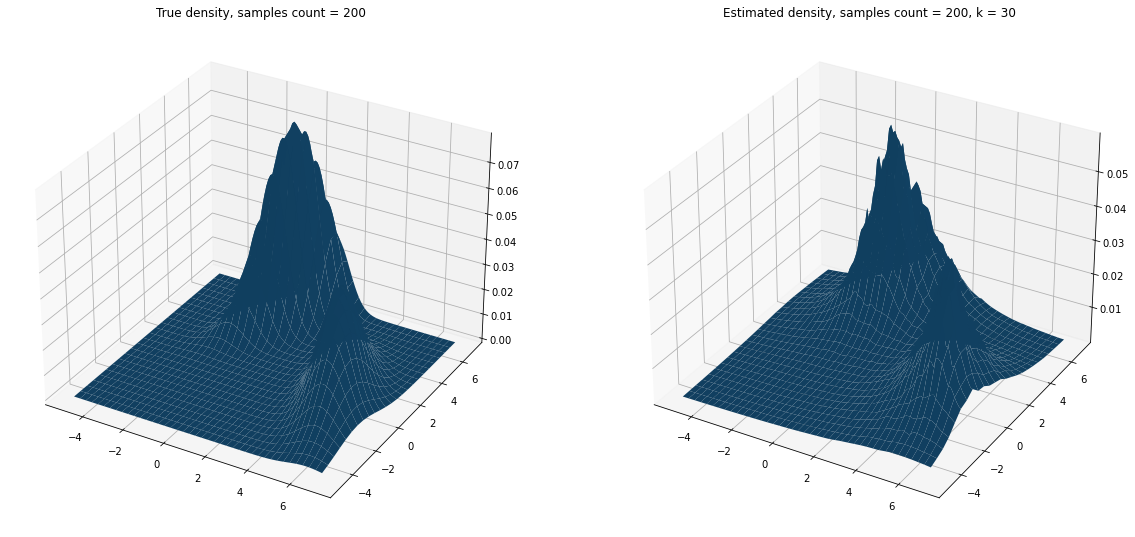

In [47]:
def knn(x, x0, k):
    distance = np.sort(np.linalg.norm(x - x0, axis = x.ndim-1), axis = 1)
    r = distance[:, k-1]
    if x0.shape[1] == 2:
        v = np.pi * r ** 2
    elif x0.shape[1] == 3:
        v = 4/3 * np.pi * r ** 3
    else:
        raise(ValueError, 'v is not defined for this shape')
    count = (distance <= r[:, np.newaxis]).sum(1)
    return count/(x0.shape[0]*v)

x, y = np.mgrid[-5:7.01:0.1, -5:7.01:0.5]
pos = np.vstack([x.flat, y.flat]).T.reshape(-1, 1, 2)
for k in [1, 10, 30]:
    estimated_density = knn(pos, samples, k).reshape(x.shape)
    true_density = stats.multivariate_normal.pdf(np.dstack([x, y]), mu1, sigma1) * .5 + stats.multivariate_normal.pdf(np.dstack([x, y]), mu2, sigma2) * .5
    plt.figure(figsize = (20, 20), facecolor = 'white')
    ax = plt.subplot(121, projection = '3d')
    ax.set_title(f'True density, samples count = {n}')
    ax.plot_surface(x, y, true_density)
    ax = plt.subplot(122, projection = '3d')
    ax.set_title(f'Estimated density, samples count = {n}, k = {k}')
    ax.plot_surface(x, y, estimated_density);